# Perceptrón

Modelamos una red neuronal (de McCulloch-Pitts) como:

1. Un vector $\mathbf{S}\subseteq\{-1,1\}^N$ (con $N\in\mathbb{N}$, $N\geq 1$ fijo) de _actividad neuronal_.
> $S_j=\pm 1$ indica que la $i-$ésima neurona está activa o pasiva.
2. Una matriz $\mathbf{J}=(J_{ij})\in\mathbb{R}^{N\times N}$ de _acoplamientos sinápticos_ (también llamada _matriz sináptica_).
3. La dinámica:
$$S_i(t+1)=\mathrm{sign}\left(\sum_{j}J_{ij}S_j(t)-\theta_i\right)$$ 
donde $\theta_i$ es un _umbral de activación_ específico de cada neurona $i$. En este caso, $t\in\mathbb{N}$ con $\mathbf{S}(0)$ fijado de antemano.
> La idea es que una neurona _suma_ la actividad entrante de todas las demás neuronas, ponderada por las fuerzas de acoplamiento sináptico correspondientes, para obtener el potencial postsináptico. Éste luego se compara con un umbral específico de cada neurona: si el potencial postsináptico supera el umbral, la neurona estará activa en el siguiente paso temporal; en caso contrario, será pasiva.
4. La función:
$$\mathcal{H}\left(\mathbf{S}\right)=-\sum_{i,j} J_{ij} S_i S_j$$
> Cuando $\mathbf{J}$ es simétrica, la función $\mathcal{H}$ está acotada inferiormente.

In [2]:
import numpy as np

class Perceptron:+
    def __init__(self, N, J, threshold):
        assert J.shape==(N,N) and len(threshold)==N
        self.nodes = np.random.choice(
            [-1.,1.],
            size=N
            )
        self.size = N
        self.couplings = J
        self.threshold = threshold
        self.energy = [-self.nodes.dot(self.couplings.dot(self.nodes))]

    def evolve(self,t):
        assert t>=0 and type(t)==int
        t_f=0
        while t_f < t:
            self.nodes=np.sign(
                self.couplings.dot(self.nodes)-self.threshold
            )
            self.energy.append(
                -self.nodes.dot(self.couplings.dot(self.nodes))
            )
            t_f+=1

In [11]:
N=100
J=np.random.normal(size=(N,N))
J=(J+J.T)/2
#threshold=np.zeros(N)
threshold=np.random.normal(size=N)
x = Perceptron(N,J,threshold)

In [12]:
x.nodes

array([-1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,  1.,
       -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
        1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,
        1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
        1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,
        1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,
       -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.])

In [13]:
x.evolve(1)
x.nodes

array([ 1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,
        1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,
        1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,
       -1., -1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.])

In [14]:
x.energy

[166.85253298018188, 357.50946658719624]

In [19]:
x.evolve(20)

In [20]:
x.energy

[166.85253298018188,
 357.50946658719624,
 287.09491770541274,
 394.67745582289814,
 269.02904895816374,
 170.71226871271256,
 133.9570796414028,
 6.430450996254699,
 1.35706959072985,
 -62.507363046043004,
 -92.43078682423314,
 -209.2353650803687,
 -150.29243308428147,
 -190.92329620974945,
 -253.17408888908042,
 -278.7835123350421,
 -310.65430000399425,
 -278.7835123350421,
 -310.65430000399425,
 -278.7835123350421,
 -310.65430000399425,
 -278.7835123350421,
 -310.65430000399425,
 -278.7835123350421,
 -310.65430000399425,
 -278.7835123350421,
 -310.65430000399425,
 -278.7835123350421,
 -310.65430000399425,
 -278.7835123350421,
 -310.65430000399425,
 -278.7835123350421]

In [21]:
import matplotlib.pyplot as plt

Text(0.5, 0, '$j$')

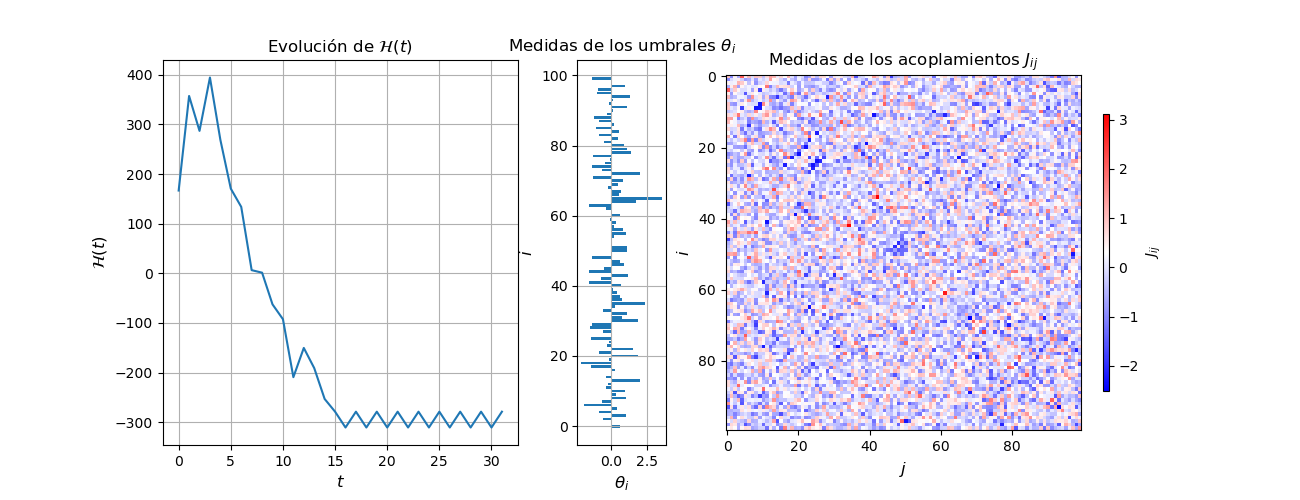

In [22]:
%matplotlib widget
fig,ax=plt.subplots(
    1,3,
    figsize=(13,5),
    width_ratios=[4,1,5]
)
ax[0].plot(x.energy)
ax[0].set_title('Evolución de $\mathcal{H}(t)$')
ax[0].set_ylabel('$\mathcal{H}(t)$',fontsize=12)
ax[0].set_xlabel('$t$',fontsize=12)
ax[0].grid()

ax[1].barh(range(x.size),x.threshold)
ax[1].set_title('Medidas de los umbrales $\\theta_{i}$')
ax[1].set_ylabel('$i$',fontsize=12)
ax[1].set_xlabel('$\\theta_i$',fontsize=12)
ax[1].grid()

im=ax[2].imshow(x.couplings,cmap='bwr')
plt.colorbar(
    im,ax=ax[2],
    shrink=0.72,
    aspect=50,
    label='$J_{ij}$'
)
ax[2].set_title('Medidas de los acoplamientos $J_{ij}$')
ax[2].set_ylabel('$i$',fontsize=12)
ax[2].set_xlabel('$j$',fontsize=12)

## Referencias 

- P. Peretto. **An introduction to the modeling of neural networks**.
   - Capítulo 3.
- A. Engel; C. Van den Browck. **Statistical mechanics of learning**.
   - Capítulos 1 y 2.